# **Ciencia de Datos e Inteligencia Artificial para la industria del software**

# *Curso MLOps*

## **Edición 2023**

# 1.3 Entrenamiento de un modelo de predicción de la duración de viajes

## 1.3.1 Análisis Exploratorio de Datos (EDA)

Vamos a descargar los [registros de viajes en taxis amarillos de enero y febrero de 2022](https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page).

In [1]:
# !wget https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2022-01.parquet https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2022-02.parquet

E importar los paquetes necesarios :

In [2]:
import pandas as pd # working with tabular data
import pickle # for machine learning models
import seaborn as sns # visualization
import matplotlib.pyplot as plt # visualization
import warnings
warnings.filterwarnings('ignore')

from sklearn.feature_extraction import DictVectorizer # Machine Learning
from sklearn.linear_model import LinearRegression # Machine Learning
from sklearn.linear_model import Lasso # Regularization
from sklearn.linear_model import Ridge # Regularization

from sklearn.metrics import mean_squared_error # Loss Function

Leer los datos de enero de 2022:

In [3]:
yellow_jan_22 = pd.read_parquet('yellow_tripdata_2022-01.parquet')
yellow_jan_22

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,1,2022-01-01 00:35:40,2022-01-01 00:53:29,2.0,3.80,1.0,N,142,236,1,14.50,3.0,0.5,3.65,0.0,0.3,21.95,2.5,0.0
1,1,2022-01-01 00:33:43,2022-01-01 00:42:07,1.0,2.10,1.0,N,236,42,1,8.00,0.5,0.5,4.00,0.0,0.3,13.30,0.0,0.0
2,2,2022-01-01 00:53:21,2022-01-01 01:02:19,1.0,0.97,1.0,N,166,166,1,7.50,0.5,0.5,1.76,0.0,0.3,10.56,0.0,0.0
3,2,2022-01-01 00:25:21,2022-01-01 00:35:23,1.0,1.09,1.0,N,114,68,2,8.00,0.5,0.5,0.00,0.0,0.3,11.80,2.5,0.0
4,2,2022-01-01 00:36:48,2022-01-01 01:14:20,1.0,4.30,1.0,N,68,163,1,23.50,0.5,0.5,3.00,0.0,0.3,30.30,2.5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2463926,2,2022-01-31 23:36:53,2022-01-31 23:42:51,NaN,1.32,NaN,None,90,170,0,8.00,0.0,0.5,2.39,0.0,0.3,13.69,NaN,NaN
2463927,2,2022-01-31 23:44:22,2022-01-31 23:55:01,NaN,4.19,NaN,None,107,75,0,16.80,0.0,0.5,4.35,0.0,0.3,24.45,NaN,NaN
2463928,2,2022-01-31 23:39:00,2022-01-31 23:50:00,NaN,2.10,NaN,None,113,246,0,11.22,0.0,0.5,2.00,0.0,0.3,16.52,NaN,NaN
2463929,2,2022-01-31 23:36:42,2022-01-31 23:48:45,NaN,2.92,NaN,None,148,164,0,12.40,0.0,0.5,0.00,0.0,0.3,15.70,NaN,NaN


In [4]:
yellow_jan_22.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2463931 entries, 0 to 2463930
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee           

Vamos a crear una nueva columna ***duración*** que calcula la duración de cada trayecto:

In [5]:
yellow_jan_22['duration'] = yellow_jan_22.tpep_dropoff_datetime - yellow_jan_22.tpep_pickup_datetime
yellow_jan_22.duration = yellow_jan_22.duration.apply(lambda td: td.total_seconds()/60)

Convirtamos también las columnas PULocationID, DOLocationID de int64 a cadenas:

In [6]:
categorical = ['PULocationID', 'DOLocationID']
numerical = ['trip_distance']

yellow_jan_22[categorical] = yellow_jan_22[categorical].astype(str)

Y mira nuestro dataframe actualizado :

In [7]:
yellow_jan_22.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2463931 entries, 0 to 2463930
Data columns (total 20 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           object        
 8   DOLocationID           object        
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee           

Genial, ahora tenemos una columna de duración y PULocationID y DOLocationID se muestran correctamente como objeto de tipo de datos (datos categóricos, que incluyen cadenas).

## 1.3.2 Distribución de nuestros datos

A menudo es útil hacerse una idea de la distribución de nuestros datos. Podemos obtener una visión rápida :

In [8]:
yellow_jan_22.describe()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,duration
count,2.463931e+06,2463931,2463931,2.392428e+06,2.463931e+06,2.392428e+06,2.463931e+06,2.463931e+06,2.463931e+06,2.463931e+06,2.463931e+06,2.463931e+06,2.463931e+06,2.463931e+06,2.392428e+06,2.392428e+06,2.463931e+06
mean,1.707819e+00,2022-01-17 01:19:51.689724,2022-01-17 01:34:04.421902,1.389453e+00,5.372751e+00,1.415507e+00,1.194449e+00,1.294648e+01,1.006710e+00,4.914539e-01,2.385696e+00,3.749773e-01,2.967234e-01,1.916937e+01,2.282322e+00,8.249935e-02,1.421220e+01
min,1.000000e+00,2008-12-31 22:23:09,2008-12-31 23:06:56,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,-4.800000e+02,-4.500000e+00,-5.000000e-01,-1.252200e+02,-3.140000e+01,-3.000000e-01,-4.803000e+02,-2.500000e+00,-1.250000e+00,-3.442400e+03
25%,1.000000e+00,2022-01-09 15:37:41,2022-01-09 15:50:50.500000,1.000000e+00,1.040000e+00,1.000000e+00,1.000000e+00,6.500000e+00,0.000000e+00,5.000000e-01,7.200000e-01,0.000000e+00,3.000000e-01,1.130000e+01,2.500000e+00,0.000000e+00,6.316667e+00
50%,2.000000e+00,2022-01-17 12:11:45,2022-01-17 12:23:49,1.000000e+00,1.740000e+00,1.000000e+00,1.000000e+00,9.000000e+00,5.000000e-01,5.000000e-01,2.000000e+00,0.000000e+00,3.000000e-01,1.469000e+01,2.500000e+00,0.000000e+00,1.018333e+01
75%,2.000000e+00,2022-01-24 13:49:37.500000,2022-01-24 14:02:51,1.000000e+00,3.130000e+00,1.000000e+00,1.000000e+00,1.400000e+01,2.500000e+00,5.000000e-01,3.000000e+00,0.000000e+00,3.000000e-01,2.002000e+01,2.500000e+00,0.000000e+00,1.616667e+01
max,6.000000e+00,2022-05-18 20:41:57,2022-05-18 20:47:45,9.000000e+00,3.061593e+05,9.900000e+01,5.000000e+00,4.010923e+05,3.350000e+01,1.659000e+01,8.888800e+02,1.933000e+02,3.000000e-01,4.010956e+05,2.500000e+00,1.250000e+00,8.513183e+03
std,5.021375e-01,NaN,NaN,9.829686e-01,5.478714e+02,5.917573e+00,5.001778e-01,2.558149e+02,1.236226e+00,8.291560e-02,2.830698e+00,1.680538e+00,4.374741e-02,2.559641e+02,7.432040e-01,3.125554e-01,4.644531e+01


In [9]:
yellow_jan_22["duration"].describe()

count    2.463931e+06
mean     1.421220e+01
std      4.644531e+01
min     -3.442400e+03
25%      6.316667e+00
50%      1.018333e+01
75%      1.616667e+01
max      8.513183e+03
Name: duration, dtype: float64

## 1.3.3 Valores atípicos potenciales

Los valores atípicos son puntos de datos que se desvían significativamente del patrón general o la distribución del resto de los datos. Son observaciones que son extremadamente diferentes o inusuales en comparación con la mayoría del conjunto de datos. Los valores atípicos pueden deberse a diversas razones, como errores de medición, errores en la entrada de datos o eventos genuinamente raros.

Los valores atípicos pueden tener un impacto sustancial en los análisis estadísticos y los modelos de aprendizaje automático. Pueden sesgar las estadísticas resumidas, como la media y la desviación estándar, lo que lleva a estimaciones sesgadas. Los valores atípicos también pueden influir en el ajuste de modelos, afectando a los coeficientes o parámetros estimados.

Parece que tenemos algunos valores atípicos en nuestro conjunto de datos. Por ejemplo, ¡la duración mínima es negativa! A menos que el DeLorean de "Volver al Futuro" esté en la flota de taxis de Nueva York, ¡esto debe ser un error! Por otro lado, la duración máxima del viaje es de 8513 minutos, lo que equivale a más de 50 días. ¿Ruta 66? Probablemente no.

## 1.3.4 Manejo de valores atípicos

Los valores atípicos pueden tratarse de diferentes maneras según el contexto y los objetivos del análisis. Algunas estrategias comunes incluyen:

* Eliminar valores atípicos: En ciertos casos, los valores atípicos pueden eliminarse del conjunto de datos si se determina que se deben a errores en la entrada de datos o problemas de medición. Sin embargo, se debe tener precaución, ya que eliminar valores atípicos indiscriminadamente puede llevar a la pérdida de información valiosa.

* Transformar los datos: Aplicar transformaciones de datos, como transformaciones logarítmicas o de potencia, puede ayudar a mitigar el impacto de los valores atípicos y hacer que los datos se distribuyan de manera más normal.

* Métodos estadísticos robustos: Utilizar técnicas estadísticas robustas, como la mediana y la desviación mediana absoluta, en lugar de la media y la desviación estándar, puede proporcionar estimadores más resistentes que son menos influenciados por los valores atípicos.

Es importante destacar que el tratamiento adecuado de los valores atípicos depende del contexto específico, del conocimiento del dominio y de los objetivos del análisis. La consideración cuidadosa y la comprensión de los datos y sus características son fundamentales para manejar los valores atípicos de manera efectiva.

En este caso, eliminaremos estos valores atípicos, ya que parece que se deben a problemas de medición. Mantendremos solo los registros en los que la duración estuvo entre 1 y 60 minutos (inclusive).

In [10]:
yellow_jan_22 = yellow_jan_22[(yellow_jan_22.duration >= 1) & (yellow_jan_22.duration <= 60)]
yellow_jan_22 

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,duration
0,1,2022-01-01 00:35:40,2022-01-01 00:53:29,2.0,3.80,1.0,N,142,236,1,14.50,3.0,0.5,3.65,0.0,0.3,21.95,2.5,0.0,17.816667
1,1,2022-01-01 00:33:43,2022-01-01 00:42:07,1.0,2.10,1.0,N,236,42,1,8.00,0.5,0.5,4.00,0.0,0.3,13.30,0.0,0.0,8.400000
2,2,2022-01-01 00:53:21,2022-01-01 01:02:19,1.0,0.97,1.0,N,166,166,1,7.50,0.5,0.5,1.76,0.0,0.3,10.56,0.0,0.0,8.966667
3,2,2022-01-01 00:25:21,2022-01-01 00:35:23,1.0,1.09,1.0,N,114,68,2,8.00,0.5,0.5,0.00,0.0,0.3,11.80,2.5,0.0,10.033333
4,2,2022-01-01 00:36:48,2022-01-01 01:14:20,1.0,4.30,1.0,N,68,163,1,23.50,0.5,0.5,3.00,0.0,0.3,30.30,2.5,0.0,37.533333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2463926,2,2022-01-31 23:36:53,2022-01-31 23:42:51,NaN,1.32,NaN,None,90,170,0,8.00,0.0,0.5,2.39,0.0,0.3,13.69,NaN,NaN,5.966667
2463927,2,2022-01-31 23:44:22,2022-01-31 23:55:01,NaN,4.19,NaN,None,107,75,0,16.80,0.0,0.5,4.35,0.0,0.3,24.45,NaN,NaN,10.650000
2463928,2,2022-01-31 23:39:00,2022-01-31 23:50:00,NaN,2.10,NaN,None,113,246,0,11.22,0.0,0.5,2.00,0.0,0.3,16.52,NaN,NaN,11.000000
2463929,2,2022-01-31 23:36:42,2022-01-31 23:48:45,NaN,2.92,NaN,None,148,164,0,12.40,0.0,0.5,0.00,0.0,0.3,15.70,NaN,NaN,12.050000


Nuestro conjunto de datos original tenía 2.463.931 filas. Tras eliminar los valores atípicos, ahora tenemos 2.421.440 filas.

In [11]:
2421440/2463931

0.9827547930522406

Aún tenemos el 98.3% de nuestro conjunto de datos original después de eliminar los valores atípicos. La eliminación de los valores atípicos no ha reducido significativamente nuestro conjunto de datos.

## 1.3.5 Codificación One-Hot

La codificación one-hot es una técnica utilizada para convertir variables categóricas en una representación numérica que puede ser utilizada por algoritmos de aprendizaje automático. Es un paso común en la preparación de datos.

En muchos algoritmos de aprendizaje automático, las variables categóricas no se pueden usar directamente como entrada, ya que estos algoritmos suelen operar con datos numéricos. La codificación one-hot transforma cada valor categórico en un vector binario, donde cada vector tiene una longitud igual al número de categorías únicas en la variable. El vector contiene todo ceros excepto un uno en el índice correspondiente a la categoría del valor original.

La codificación one-hot permite a los modelos de aprendizaje automático capturar de manera efectiva la información categórica y manejarla como entrada numérica. Sin embargo, aumenta la dimensionalidad de los datos, especialmente cuando se trata de variables con muchas categorías únicas. Esto puede afectar la eficiencia computacional y el rendimiento del modelo, especialmente en casos donde el número de categorías es grande en relación con el número de observaciones.

Para ilustrar, apliquemos la codificación one-hot a las ubicaciones de recogida y entrega (pickup y dropoff location IDs). Utilizaremos solo estas dos características para nuestro modelo.

In [11]:
# turn the categorical columns into a list of dictionaries
list_of_dicts = yellow_jan_22[categorical].to_dict(orient='records')

In [12]:
# Instantiate a dictionary vectorizer
dv = DictVectorizer()

In [13]:
# Fit the vectorizer and transform the data into a feature matrix
fm = dv.fit_transform(list_of_dicts)

# Convert the feature matrix to an array
fm_array = fm.toarray()

# Print the dimensionality of the feature matrix
dimensionality = fm_array.shape
print("Dimensionality:", dimensionality)

Dimensionality: (2421440, 515)


Entonces, nuestra matriz de características tiene 2,421,440 filas y 515 columnas (originalmente 20 antes de la codificación one-hot).

## 1.3.6 Función de preprocesamiento personalizada

Hemos realizado una serie de pasos para preparar nuestros datos para el entrenamiento. Podríamos automatizar esto creando una función personalizada:

In [14]:
def read_dataframe(filename):
    if filename.endswith('.csv'):
        df = pd.read_csv(filename)

        df.tpep_dropoff_datetime = pd.to_datetime(df.tpep_dropoff_datetime)
        df.tpep_pickup_datetime = pd.to_datetime(df.tpep_pickup_datetime)
    elif filename.endswith('.parquet'):
        df = pd.read_parquet(filename)

    df['duration'] = df.tpep_dropoff_datetime - df.tpep_pickup_datetime
    df.duration = df.duration.apply(lambda td: td.total_seconds() / 60)

    df = df[(df.duration >= 1) & (df.duration <= 60)]

    categorical = ['PULocationID', 'DOLocationID']
    df[categorical] = df[categorical].astype(str)
    
    return df

## 1.3.7 Entrenamiento de un modelo

Ahora, vamos a utilizar la matriz de características obtenida en el paso anterior para entrenar un modelo de Regresión Lineal:

In [15]:
# Convert categorical columns to a dictionary
train_dicts = yellow_jan_22[categorical].to_dict(orient='records')

# Instantiate a dictionary vectorizer
dv = DictVectorizer()

# Set up trainign set
X_train = dv.fit_transform(train_dicts)

In [16]:
# define target variable and assign to y_train
target = 'duration'
y_train = yellow_jan_22[target].values

## 1.3.8 Regresión Lineal

Un modelo de regresión lineal es un enfoque estadístico utilizado para modelar la relación entre una variable dependiente y una o más variables independientes. Supone una relación lineal entre las variables y busca encontrar la mejor línea de ajuste que minimice las diferencias entre los valores predichos y los valores reales.

El modelo supone que la variable dependiente puede expresarse como una combinación lineal de las variables independientes, donde cada variable independiente se multiplica por un coeficiente y se suma junto con un término de intercepción. Los coeficientes representan el efecto de cada variable independiente en la variable dependiente, y el término de intercepción representa el valor esperado de la variable dependiente cuando todas las variables independientes son cero.

Los modelos de regresión lineal se utilizan ampliamente para diversos fines, como predecir las ventas basadas en el gasto en publicidad, analizar el impacto de las variables independientes en una variable dependiente y realizar pronósticos.

En nuestro caso, vamos a utilizar la regresión lineal para predecir la duración de los viajes en taxi.


In [17]:
# instantiate linear regression model with default parameters
lr = LinearRegression()

# fit model to training data
lr.fit(X_train, y_train)

LinearRegression()

## 1.3.9 Obtener predicciones

Una vez que el modelo está entrenado, se puede utilizar para realizar predicciones al introducir nuevos valores para las variables independientes. El modelo asume que la relación entre las variables sigue siendo lineal y que las suposiciones subyacentes, como la linealidad, la independencia y la homocedasticidad, se mantienen válidas.

In [18]:
# get predictions
y_pred = lr.predict(X_train)

## 1.3.10 Función de pérdida - RMSE

El proceso de construir un modelo de regresión lineal implica estimar los coeficientes que minimizan una métrica de error elegida, como el error cuadrático medio (MSE, por sus siglas en inglés). Esto se hace típicamente utilizando una técnica llamada mínimos cuadrados ordinarios (OLS, por sus siglas en inglés), que encuentra los coeficientes que minimizan la suma de las diferencias al cuadrado entre los valores predichos y los valores reales.

El RMSE es la raíz cuadrada del error cuadrático medio (MSE, por sus siglas en inglés).

In [19]:
# calculate RMSE
mean_squared_error(y_train, y_pred, squared=False) # squared = False so this is root MSE (RMSE)

6.986191236222312

## 1.3.11 Evaluación de nuestro modelo - conjunto de validación

Después de entrenar el modelo en el conjunto de entrenamiento, se evalúa el rendimiento del modelo en el conjunto de validación.

Un conjunto de validación, también conocido como conjunto de datos de testeo, es un subconjunto de datos utilizado para evaluar el rendimiento y la capacidad de generalización de un modelo de aprendizaje automático. Es importante destacar que el conjunto de validación debe mantenerse separado del conjunto de entrenamiento y no debe utilizarse para entrenar el modelo. Mezclar los datos de entrenamiento y validación puede llevar a estimaciones de rendimiento sesgadas y una evaluación ineficaz del modelo.

El propósito de un conjunto de validación es proporcionar una estimación imparcial de cuán bien el modelo se desempeñará en datos nuevos y no vistos. Ayuda a evaluar si el modelo ha aprendido los patrones y relaciones subyacentes en los datos o si ha sobreajustado o subajustado los datos de entrenamiento.

Una vez que los hiperparámetros del modelo están optimizados, una evaluación final en un conjunto de prueba separado, que representa datos completamente nuevos y no vistos, proporciona una evaluación más precisa del rendimiento y la capacidad de generalización del modelo.

Vamos a evaluar nuestro modelo en el conjunto de datos de taxis amarillos de febrero de 2022 que descargamos anteriormente:

In [20]:
# read in the validation set
yellow_feb_22 = pd.read_parquet('yellow_tripdata_2022-02.parquet')

# create a new column 'duration' in minutes
yellow_feb_22['duration'] = yellow_feb_22.tpep_dropoff_datetime - yellow_feb_22.tpep_pickup_datetime
# convert duration to seconds
yellow_feb_22.duration = yellow_feb_22.duration.apply(lambda td: td.total_seconds()/60)

# define categorical and numerical columns
categorical = ['PULocationID', 'DOLocationID']
numerical = ['trip_distance']

# convert categorical columns to strings
yellow_feb_22[categorical] = yellow_feb_22[categorical].astype(str)

# remove outliers by clipping duration between 1 and 60 mins
yellow_feb_22 = yellow_feb_22[(yellow_feb_22.duration >= 1) & (yellow_feb_22.duration <= 60)]

# Instantiate a dictionary vectorizer
# dv = DictVectorizer()

# reinstate our training set
# train_dicts = yellow_jan_22[categorical].to_dict(orient='records')
# X_train = dv.fit_transform(train_dicts)

# turn the categorical columns into a list of dictionaries
val_dicts = yellow_feb_22[categorical].to_dict(orient='records')
X_val = dv.transform(val_dicts)

# define target variable and assign to y_val
target = 'duration'
# y_train = yellow_jan_22[target].values
y_val = yellow_feb_22[target].values

# instantiate & fit our model to the TRAINING set
# lr = LinearRegression()
# lr.fit(X_train,y_train)

# Get predictions for the VALIDATION set
y_pred = lr.predict(X_val)

# calculate RMSE
mean_squared_error(y_val, y_pred, squared=False) # squared = False so this is root MSE (RMSE)

7.78641213132457

Entonces, el RMSE en el conjunto de validación es de 7.79 en comparación con 6.99 en el conjunto de prueba. Esto significa que nuestras predicciones sobre la duración de los viajes en taxi son incorrectas en promedio por 8 minutos. Este es un punto de partida para la mejora.

## 1.3.12 Visualización

Podemos visualizar nuestras predicciones frente a los valores reales utilizando la biblioteca Seaborn:

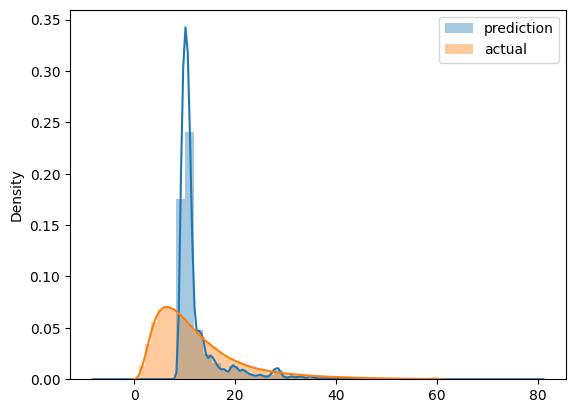

In [22]:
sns.distplot(y_pred, label='prediction')
sns.distplot(y_train, label='actual')

plt.legend()

## 1.3.13 Otros modelos

**Least Absolute Shrinkage and Selection Operator (Lasso)**

La regularización Lasso agrega el valor absoluto de los coeficientes multiplicados por una constante, llamada parámetro de regularización o alfa, a la función de pérdida. La característica principal de Lasso es que puede reducir los coeficientes hasta llegar a cero, realizando efectivamente la selección de características al eliminar características irrelevantes o menos importantes. Esta propiedad hace que Lasso sea útil cuando se trata de conjuntos de datos de alta dimensionalidad o cuando se intenta identificar los predictores más significativos.

Lasso tiende a funcionar bien cuando hay muchas características irrelevantes o se necesita selección de características. Sin embargo, puede tener dificultades con características altamente correlacionadas o situaciones en las que hay más predictores que observaciones.


In [23]:
lr = Lasso() # default parameters
lr.fit(X_train, y_train)

y_pred - lr.predict(X_val)

mean_squared_error(y_val, y_pred, squared=False)

7.78641213132457

In [24]:
lr = Lasso(alpha=0.01) # try using different values for alpha - this controls the speed of gradient descent
lr.fit(X_train, y_train)

y_pred - lr.predict(X_val)

mean_squared_error(y_val, y_pred, squared=False)

7.78641213132457

**Ridge (regularización de Tikhonov o regularización L2)**

La regularización Ridge agrega el valor al cuadrado de los coeficientes multiplicado por el parámetro de regularización a la función de pérdida. A diferencia de Lasso, Ridge no elimina completamente los coeficientes, sino que los reduce hacia cero sin llegar a cero. Esto conduce a una reducción en la magnitud de los coeficientes, reduciendo efectivamente la complejidad del modelo. La regularización Ridge es particularmente útil cuando se trata de multicolinealidad, una situación en la que las variables predictoras están altamente correlacionadas.

La elección entre regularización Lasso y Ridge depende de las características específicas del conjunto de datos y de los objetivos del análisis. En la práctica, es común probar ambas técnicas y seleccionar la que arroje los mejores resultados o combinarlas en un enfoque híbrido llamado regularización Elastic Net.


In [25]:
lr = Ridge(alpha=0.01) # try using different values for alpha - this controls the speed of gradient descent
lr.fit(X_train, y_train)

y_pred - lr.predict(X_val)

mean_squared_error(y_val, y_pred, squared=False)

7.78641213132457

Tanto el modelo Lasso como el Ridge producen los mismos resultados que nuestro modelo estándar de regresión lineal. Esto no es sorprendente, ya que nuestro modelo sólo tiene en cuenta dos características, PULocationID y DOLocationID. Incluyamos más características.

## 1.3.14 Ingeniería de características

La ingeniería de características es el proceso de transformar datos brutos en características significativas e informativas que pueden ser utilizadas por algoritmos de aprendizaje automático. Implica seleccionar, extraer y manipular atributos de datos para mejorar el rendimiento de un modelo. El objetivo es crear características que capturen patrones relevantes, relaciones y conocimientos del conjunto de datos, lo que conduce a una mayor capacidad predictiva.

Las técnicas de ingeniería de características incluyen el manejo de valores faltantes, la escalación o normalización de características numéricas, la codificación de variables categóricas, la creación de nuevas características mediante operaciones matemáticas o conocimientos de dominio, y la reducción de dimensionalidad mediante técnicas como el análisis de componentes principales (PCA).

La ingeniería de características efectiva puede tener un impacto significativo en el rendimiento de los modelos de aprendizaje automático al mejorar su precisión, robustez y capacidad de interpretación.

Vamos a intentar nuevamente la Regresión Lineal con nuestras columnas categóricas actualizadas para esta nueva característica:


In [21]:
df_train = read_dataframe('yellow_tripdata_2022-01.parquet')
df_val = read_dataframe('yellow_tripdata_2022-02.parquet')

df_train['PU_DO'] = df_train['PULocationID'] + '_' + df_train['DOLocationID']
df_val['PU_DO'] = df_val['PULocationID'] + '_' + df_val['DOLocationID']

categorical = ['PU_DO'] #'PULocationID', 'DOLocationID']
numerical = ['trip_distance']

dv = DictVectorizer()

train_dicts = df_train[categorical].to_dict(orient='records')
X_train = dv.fit_transform(train_dicts)

val_dicts = df_val[categorical].to_dict(orient='records')
X_val = dv.transform(val_dicts)

target = 'duration'
y_train = df_train[target].values
y_val = df_val[target].values

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_val)

mean_squared_error(y_val, y_pred, squared=False)

5.415111329682275

Se trata de una mejora significativa. El error medio de predicción ha bajado de 7,79 a 5,42 minutos.

## 1.3.15 Guardar nuestro modelo

Pickling es un proceso en Python que te permite serializar (convertir en una secuencia de bytes) y almacenar objetos, como modelos de aprendizaje automático, en un archivo. Este objeto serializado se puede guardar en el disco y luego cargar de nuevo en la memoria, lo que te permite preservar el estado del modelo para su uso futuro.

El módulo pickle en Python proporciona funciones para hacer pickling y unpickling de objetos. Cuando haces pickling de un modelo, se guardan los parámetros del modelo, su estado interno y otra información necesaria para su funcionamiento. Esto te permite guardar modelos entrenados y usarlos más adelante sin necesidad de volver a entrenarlos cada vez.

Hacer pickling de un modelo es útil para varios propósitos, como:

- Guardar modelos entrenados: Puedes hacer pickling de tu modelo entrenado y guardarlo como un archivo. Más tarde, puedes cargar el modelo desde el archivo y usarlo para hacer predicciones sin necesidad de volver a entrenar el modelo.

- Compartir modelos: El pickling te permite compartir modelos con otras personas, lo que les permite usar tu modelo entrenado sin necesidad de tener acceso a los datos de entrenamiento originales ni de volver a entrenar el modelo.

- Desplegar modelos en producción: Puedes hacer pickling de un modelo entrenado y cargarlo en un entorno de producción para realizar predicciones en tiempo real.

![](https://media.istockphoto.com/id/869118084/es/foto/sal-pepino-aislado-sobre-fondo-blanco.jpg?s=612x612&w=is&k=20&c=JJri-VNcD8AvRHB0Tlx7TwFX9hKA3OnKuT-2tONP-GQ=)

En primer lugar, vamos a crear un nuevo directorio para almacenar nuestro modelo :

In [22]:
!mkdir models

Ya existe el subdirectorio o el archivo models.


And save our model :

In [23]:
with open('./models/lin_reg.bin', 'wb') as f_out: # wb means write binary mlops-zoomcamp/week_1/models
    try:
        # Pickle both the dictionary vectorizer and the linear regression model
        pickle.dump((dv, lr), f_out)
        print("Model successfully pickled.")
    except Exception as e:
        print("Error occurred while pickling the model:", str(e))

Model successfully pickled.


## 1.4 Madurez de MLOps

La madurez de MLOps (Operaciones de Aprendizaje Automático) se refiere al nivel de sofisticación y eficacia en la gestión y operacionalización de sistemas de aprendizaje automático (ML) dentro de una organización. Representa la capacidad de la organización para desarrollar, implementar, supervisar y mantener modelos de ML de manera confiable y escalable. La madurez de MLOps generalmente evoluciona a través de diferentes etapas, que pueden variar según el marco o modelo utilizado. Aquí tienes una descripción general de las etapas:

* Ad hoc: En las primeras etapas, el desarrollo de ML es ad hoc y carece de un enfoque sistemático. Los modelos se desarrollan e implementan de manera manual sin procesos estandarizados ni control de versiones. Hay una colaboración limitada entre científicos de datos y equipos de TI/DevOps.

* Gestionado: A medida que las organizaciones reconocen la importancia del ML, comienzan a implementar prácticas de gestión básicas. Se introduce el control de versiones y se realizan seguimientos de modelos. Sin embargo, todavía puede haber pasos manuales involucrados y los procesos de implementación pueden no estar bien definidos.

* Automatizado: En esta etapa, la automatización juega un papel crucial en MLOps. Las organizaciones adoptan canalizaciones de integración y despliegue continuo (CI/CD) para automatizar el entrenamiento, la evaluación y la implementación de modelos. La provisión de infraestructura, las pruebas y la supervisión se vuelven más simplificadas. Existe una colaboración más sólida entre científicos de datos, ingenieros de software y equipos de TI/DevOps.

* Orquestado: Los procesos de MLOps están integrados y orquestados en todo el ciclo de vida de ML. Se emplean herramientas y marcos de automatización avanzados para gestionar la complejidad de los flujos de trabajo de ML. Se enfoca en la reproducibilidad, la versión de modelos y el seguimiento de experimentos. Los modelos de ML se implementan de manera escalable y eficiente, haciendo uso de plataformas de contenerización y orquestación.

* Regulado: MLOps está completamente integrado en el marco de gobierno de la organización. Se tienen en cuenta consideraciones de cumplimiento, seguridad y regulación en todo el ciclo de vida de ML. Se supervisa continuamente el rendimiento y la supervisión de modelos, y se establecen bucles de retroalimentación para mejorar los modelos con el tiempo. La explicabilidad e interpretabilidad de los modelos se consideran importantes.

Lograr niveles más altos de madurez de MLOps requiere inversión en infraestructura, herramientas y establecimiento de mejores prácticas. También implica fomentar la colaboración y comunicación entre diferentes equipos involucrados en el desarrollo e implementación de ML. Las organizaciones con mayor madurez de MLOps están mejor preparadas para enfrentar los desafíos de escalar proyectos de ML, garantizar la confiabilidad del modelo y maximizar el valor derivado de las iniciativas de ML.

Encontrará un resumen detallado [aquí](https://learn.microsoft.com/en-us/azure/architecture/example-scenario/mlops/mlops-maturity-model) by Microsoft Azure.